## 初步处理数据 Visualize the data in heatmap

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

In [46]:
data = np.loadtxt('F:\data.txt')
df = pd.DataFrame(data)

In [54]:
df = df.iloc[1:] # 删除第一行 第一个数据可能不准确

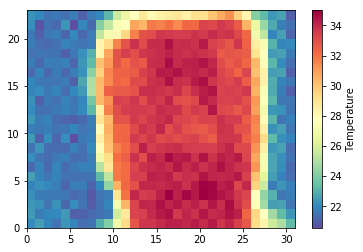

In [45]:
# 按热力图画出温度分布
X, Y = np.meshgrid(np.linspace(0, 31, 32), np.linspace(0, 23, 24))
temperature = df.iloc[20]
temperature0 = np.zeros([24, 32]) 
k = 0
for i in range(24):
    for j in range(32):
        temperature0[-1-i, -1-j] = temperature[k] #之所以要-1-j是因为temperature0矩阵的第一行对应的其实是图的最下面一行
        k += 1

fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1)
c = ax.pcolormesh(X, Y, temperature0, cmap='Spectral_r')
cb = fig.colorbar(c)
cb.set_label('Temperature')
plt.show()

## 尝试让温度分区更加细一点，能不能划分出面部结构 Higher sensitivity heat map

In [213]:
# 让脸部温度单独保存，环境温度设计为统一值
ta = df.min(axis=1)

df_face = pd.DataFrame()
df_onlyface = pd.DataFrame()
for i, minTa in zip(df.values, ta):
    face = []
    onlyface = []
    for j in i:
        if j - minTa > 7:
            face.append(j)
            onlyface.append(j)
        else:
            face.append(minTa)
    face_todf = pd.DataFrame(face).T
    onlyface_todf = pd.DataFrame(onlyface).T
    df_face = pd.concat([df_face, face_todf], axis = 0)
    df_onlyface = pd.concat([df_onlyface, onlyface_todf], axis = 0)

In [214]:
df_onlyface.index = range(df_onlyface.shape[0])

结果表现一般，用90640区分脸部不同区域存在较大困难，先探究温度点频数和热舒适度的联系

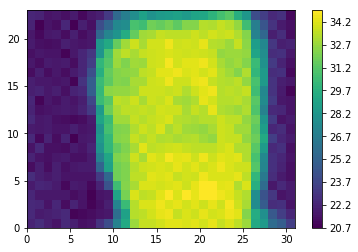

In [97]:
# 设计更细致的温度分级（成不同颜色）
cmap = plt.get_cmap(name='Spectral_r')
levels = MaxNLocator(nbins=100).tick_values(temperature_i.min(), temperature_i.max())  # 分成binb
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# 把温度处理成矩阵
temperature_i = df_face.iloc[20]
temperature0 = np.zeros([24, 32]) 
k = 0
for i in range(24):
    for j in range(32):
        temperature0[-1-i, -1-j] = temperature[k] #之所以要-1-j是因为temperature0矩阵的第一行对应的其实是图的最下面一行
        k += 1

fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1)
im = ax0.pcolormesh(X, Y, temperature0, norm=norm)
fig.colorbar(im, ax=ax0)
plt.show()